# Example 1: Iris Classification

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt


# if you want to run this ipynb, you need to create an environment with 'conda create -n tut python=3.7' 
# in the terminal of your computer. 
# Then activate this environment with 'conda activate tut'.
# After activating, install the necessary respository with 'conda install xxx', 
# where xxx means 'pandas/numpy/seaborn/sklearn/matplotlib'
# If you have questions, google/baidu the key words "conda create env"/"conda install"


In [2]:
# import datasets in sklearn
import sklearn.datasets as sk_datasets
iris = sk_datasets.load_iris()
iris_X = iris.data #data
iris_y = iris.target #label

iris_X.shape, len(iris_y)

((150, 4), 150)

In [3]:
iris.items(), iris_X.shape, len(iris_y), type(iris_X), type(iris_y)

(dict_items([('data', array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 

In [4]:
f_label = iris.feature_names

iris_X_pd = pd.DataFrame(iris_X, columns = f_label)
iris_y_pd = pd.DataFrame(iris_y, columns = ['Class'])

iris_X_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
iris_X_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_y_pd

,Class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [7]:
iris_y_pd.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [8]:
# alternative methods to transfer iris to dataframe
iris_total = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_total['iris_type'] = iris.target
iris_total.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris_total['iris_type'] = iris.target_names[iris.target]
iris_total.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Visualize the dataset with seaborn

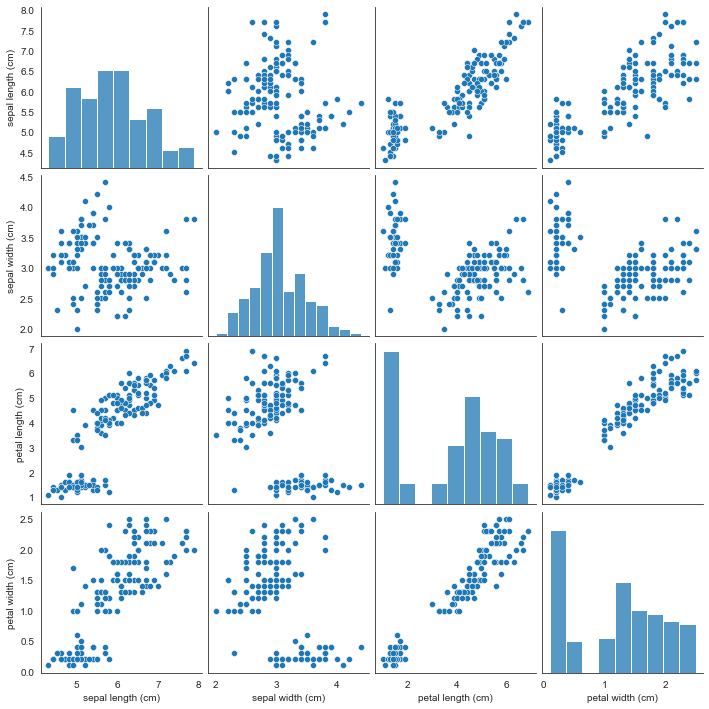

In [10]:
sns.set_style('white',{'font.sans-serif':['simhei', 'Arial']})
sns.pairplot(iris_total)
# default sns.pairplot kind = 'scatter'

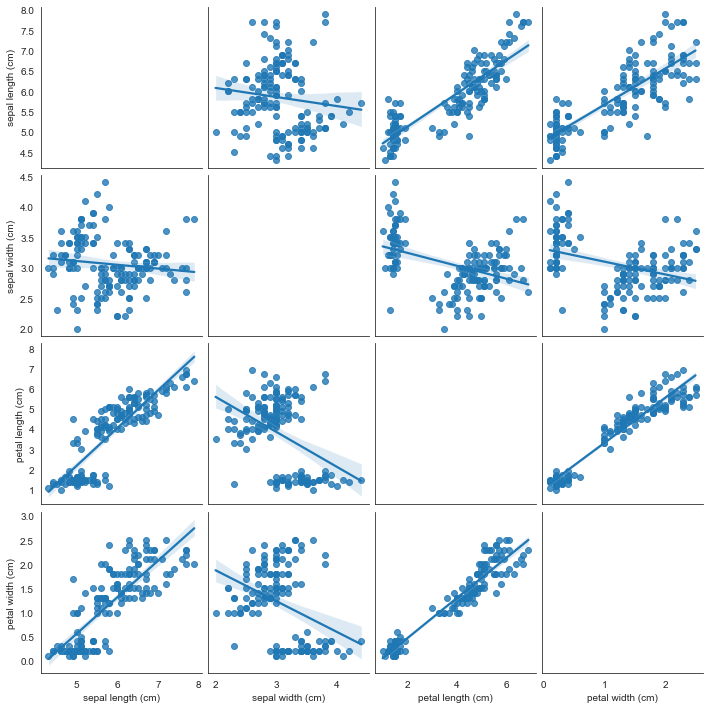

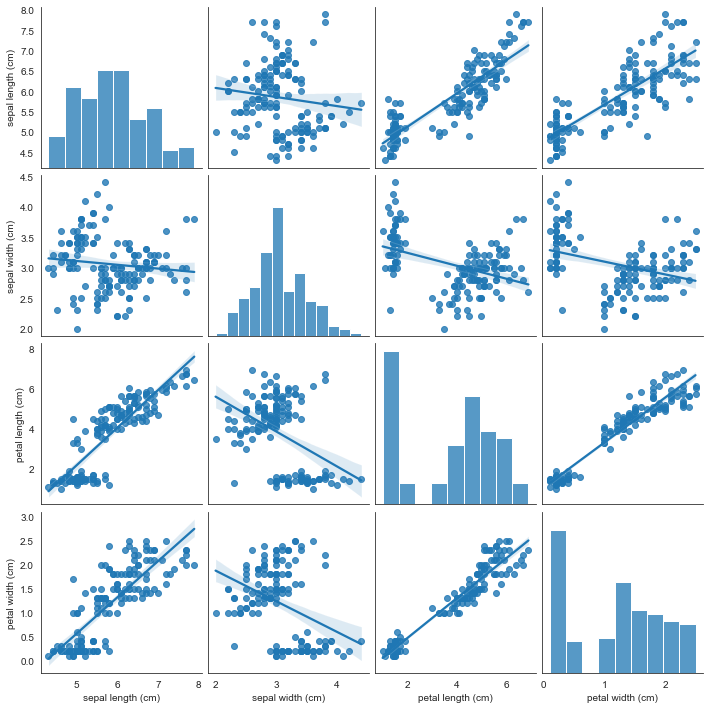

In [11]:
sns.pairplot(iris_total, kind='reg', diag_kind = 'ked')
sns.pairplot(iris_total, kind='reg', diag_kind = 'hist')
# kind:{'scatter', 'reg'}, diag_kind:{'hist', 'kde'}

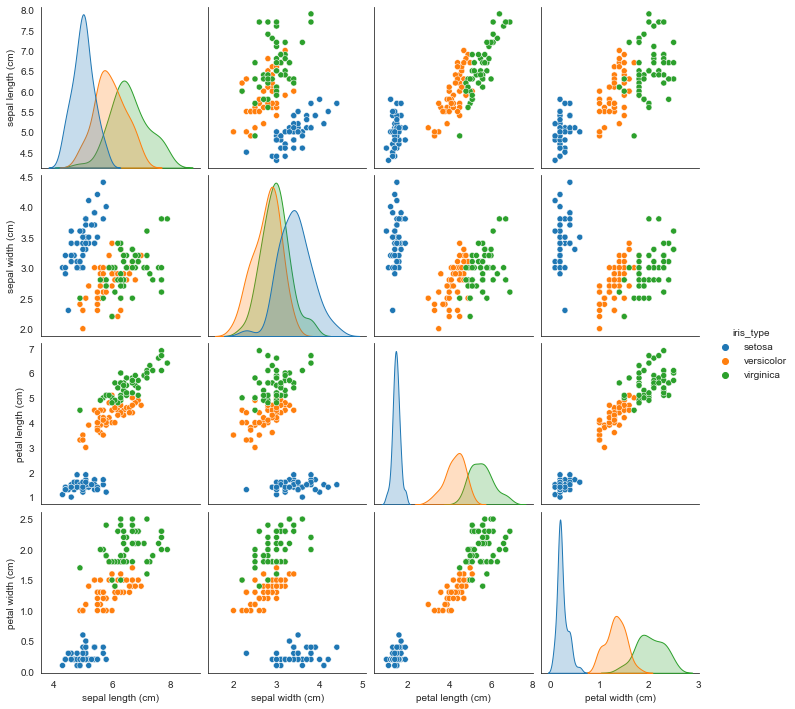

In [12]:
sns.pairplot(iris_total, hue='iris_type')
# classification by some column

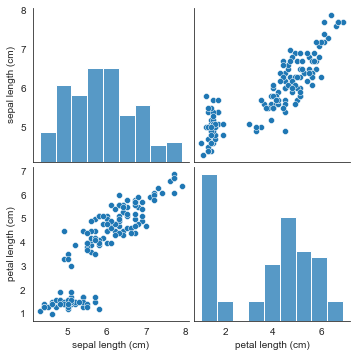

In [13]:
sns.pairplot(iris_total, vars=['sepal length (cm)','petal length (cm)'])
# plot the variance of two columns

# Data Preprocessing

In [14]:
import sklearn.preprocessing as sk_preprocessing

In [15]:
scaler = sk_preprocessing.StandardScaler().fit(iris_X)
iris_std_X = scaler.transform(iris_X)
pd.DataFrame(iris_std_X)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [16]:
scaler = sk_preprocessing.MinMaxScaler(feature_range=(0,1)).fit(iris_X)
iris_minmax_X = scaler.transform(iris_X)
pd.DataFrame(iris_minmax_X)

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [17]:
# Iris split
import sklearn.model_selection as sk_model_selection
iris_X_train, iris_X_test, iris_y_train, iris_y_test = sk_model_selection.train_test_split(
    iris_std_X,iris_y,train_size=0.8,random_state=20)

iris_X_train.shape, iris_X_test.shape, iris_y_train.shape, iris_y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [18]:
pd.DataFrame(iris_X_train)

,0,1,2,3
0,-0.173674,-0.131979,0.251221,0.000878
1,-0.294842,-0.131979,0.194384,0.132510
2,-0.900681,1.019004,-1.340227,-1.315444
3,-0.900681,1.709595,-1.226552,-1.315444
4,-1.264185,0.788808,-1.226552,-1.315444
...,...,...,...,...
115,-1.506521,1.249201,-1.567576,-1.315444
116,0.916837,-0.131979,0.364896,0.264142
117,0.674501,0.098217,0.990108,0.790671
118,-0.173674,3.090775,-1.283389,-1.052180


In [19]:
pd.DataFrame(iris_X_test)

,0,1,2,3
0,-1.506521,0.328414,-1.340227,-1.315444
1,0.310998,-0.592373,0.535409,0.000878
2,0.674501,-0.362176,0.308059,0.132510
3,1.643844,-0.131979,1.160620,0.527406
4,-0.052506,-0.822570,0.194384,-0.262387
5,-0.416010,-1.282963,0.137547,0.132510
6,1.159173,0.328414,1.217458,1.448832
7,-0.900681,1.479398,-1.283389,-1.052180
8,1.038005,-1.282963,1.160620,0.790671
9,-1.264185,-0.131979,-1.340227,-1.447076


## import MLP Classifier module and train

In [20]:
import sklearn.neural_network as sk_nn
model_adam = sk_nn.MLPClassifier(activation='tanh',solver='adam',alpha=0.0001,learning_rate='adaptive',
                            learning_rate_init=0.001,max_iter=2000)
model_adam.fit(iris_X_train, iris_y_train)
predi = model_adam.predict(iris_X_test)
acc_adam = model_adam.score(iris_X_test, iris_y_test) # prediction correctness rate

print('Correctness Rate:\n', acc_adam), predi, iris_y_test

Correctness Rate:
 0.9666666666666667


(None,
 array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
        2, 0, 1, 1, 1, 0, 2, 1]),
 array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
        2, 0, 1, 1, 1, 0, 2, 2]))

In [21]:
RMSE = math.sqrt(np.square(np.subtract(predi, iris_y_test)).mean())

RMSE

0.18257418583505536

In [22]:
# SGD iris
model_SGD = sk_nn.MLPClassifier(activation='tanh', solver='sgd', alpha=0.0001, learning_rate='adaptive',
                                learning_rate_init=0.001, max_iter=2000)
model_SGD.fit(iris_X_train, iris_y_train)
predi_SGD = model_SGD.predict(iris_X_test)
acc_SGD = model_SGD.score(iris_X_test, iris_y_test) 
RMSE_sgd = math.sqrt(np.square(np.subtract(predi_SGD, iris_y_test)).mean())


print('Rate:\n', acc_SGD), predi_SGD, iris_y_test, RMSE_sgd

Rate:
 0.9333333333333333


(None,
 array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
        2, 0, 1, 1, 1, 0, 2, 1]),
 array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
        2, 0, 1, 1, 1, 0, 2, 2]),
 0.2581988897471611)

In [23]:
# LBFGS iris
model_lb = sk_nn.MLPClassifier(activation='relu', solver='lbfgs', alpha=0.0001, learning_rate='adaptive',
                               learning_rate_init=0.001, max_iter=2000)
model_lb.fit(iris_X_train, iris_y_train)
predi_lb = model_lb.predict(iris_X_test)
acc_lb = model_lb.score(iris_X_test, iris_y_test) 
RMSE_lbfgs = math.sqrt(np.square(np.subtract(predi_lb, iris_y_test)).mean())

print('Rate:\n', acc_lb), predi_lb, iris_y_test

Rate:
 0.9333333333333333


(None,
 array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
        2, 0, 1, 1, 1, 0, 2, 1]),
 array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
        2, 0, 1, 1, 1, 0, 2, 2]))

# Example 2: LDAPS Regression





In [24]:
# read LDAPS.csv with pandas
data_csv = pd.read_csv("Regression.csv")
data_csv.shape

(7752, 25)

In [25]:
data_csv

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [26]:
data_csv[270:310]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
270,21.0,2013-07-10,26.2,24.7,69.812981,93.854797,27.970640,24.910094,9.329822,13.594018,...,0.021013,0.001630,0.000000,37.5507,127.040,26.2980,0.5721,5779.554199,25.5,23.7
271,22.0,2013-07-10,NaN,NaN,72.196007,95.168205,28.097980,24.510159,8.374849,38.782242,...,0.007261,0.000000,0.000000,37.5102,127.086,21.9668,0.1332,5772.487305,26.1,24.1
272,23.0,2013-07-10,26.4,24.9,77.231949,96.423988,26.700805,24.083975,10.198014,41.800662,...,0.036961,0.001953,0.000000,37.5372,126.891,15.5876,0.1554,5771.209473,25.5,24.2
273,24.0,2013-07-10,26.6,24.9,73.525047,95.597847,27.198894,24.318422,10.418321,26.420496,...,0.028333,0.001953,0.000000,37.5237,126.909,17.2956,0.2223,5769.862305,25.7,24.2
274,25.0,2013-07-10,26.8,25.2,69.310020,94.079872,27.941781,24.660475,9.427851,15.670115,...,0.020314,0.001306,0.000000,37.5237,126.970,19.5844,0.2713,5775.272461,26.0,24.3
275,1.0,2013-07-11,22.4,21.7,95.818939,98.020599,23.356801,21.447190,11.558632,25.803418,...,4.398933,3.587557,0.520114,37.6046,126.991,212.3350,2.7850,5904.711426,21.8,21.1
276,2.0,2013-07-11,25.2,23.8,89.471741,96.026222,24.905254,22.832034,9.144509,43.099107,...,4.214027,3.230903,0.502909,37.6046,127.032,44.7624,0.5141,5778.176270,24.3,23.0
277,3.0,2013-07-11,25.5,23.9,84.330078,93.854469,25.542354,23.089602,8.686600,48.461266,...,3.649876,3.350539,0.697959,37.5776,127.058,33.3068,0.2661,5772.467285,24.7,23.1
278,4.0,2013-07-11,25.6,24.4,93.700851,98.600471,24.842995,22.606876,9.513427,38.765905,...,4.076399,2.971699,0.392883,37.6450,127.022,45.7160,2.5348,5765.659668,24.7,23.4
279,5.0,2013-07-11,25.6,24.3,88.987877,96.696747,24.816114,22.982949,9.158965,41.388661,...,2.447689,3.895903,0.828189,37.5507,127.135,35.0380,0.5055,5767.609375,25.0,23.4


In [27]:
## pandas iloc, mean NaN

LDAPS_X = data_csv.iloc[:,2:-2]
LDAPS_Y = data_csv.iloc[:,-2::]

LDAPS_X_clean = LDAPS_X.fillna(LDAPS_X.mean())
LDAPS_Y_clean = LDAPS_Y.fillna(LDAPS_Y.mean())

LDAPS_X_clean.shape, LDAPS_Y_clean.shape

((7752, 21), (7752, 2))

In [28]:
LDAPS_X_clean[270:310]

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
270,26.200000,24.700000,69.812981,93.854797,27.970640,24.910094,9.329822,13.594018,0.832815,0.580994,...,0.723295,0.036881,0.021013,0.001630,0.000000,37.5507,127.040,26.2980,0.5721,5779.554199
271,29.768211,23.225059,72.196007,95.168205,28.097980,24.510159,8.374849,38.782242,0.796409,0.570621,...,0.689160,0.022148,0.007261,0.000000,0.000000,37.5102,127.086,21.9668,0.1332,5772.487305
272,26.400000,24.900000,77.231949,96.423988,26.700805,24.083975,10.198014,41.800662,0.822686,0.610770,...,0.637830,0.035240,0.036961,0.001953,0.000000,37.5372,126.891,15.5876,0.1554,5771.209473
273,26.600000,24.900000,73.525047,95.597847,27.198894,24.318422,10.418321,26.420496,0.811377,0.607672,...,0.618894,0.032416,0.028333,0.001953,0.000000,37.5237,126.909,17.2956,0.2223,5769.862305
274,26.800000,25.200000,69.310020,94.079872,27.941781,24.660475,9.427851,15.670115,0.809065,0.595646,...,0.657225,0.029818,0.020314,0.001306,0.000000,37.5237,126.970,19.5844,0.2713,5775.272461
275,22.400000,21.700000,95.818939,98.020599,23.356801,21.447190,11.558632,25.803418,0.882198,0.963207,...,0.862037,0.621599,4.398933,3.587557,0.520114,37.6046,126.991,212.3350,2.7850,5904.711426
276,25.200000,23.800000,89.471741,96.026222,24.905254,22.832034,9.144509,43.099107,0.859223,0.887668,...,0.878692,0.594784,4.214027,3.230903,0.502909,37.6046,127.032,44.7624,0.5141,5778.176270
277,25.500000,23.900000,84.330078,93.854469,25.542354,23.089602,8.686600,48.461266,0.824891,0.906632,...,0.884655,0.302416,3.649876,3.350539,0.697959,37.5776,127.058,33.3068,0.2661,5772.467285
278,25.600000,24.400000,93.700851,98.600471,24.842995,22.606876,9.513427,38.765905,0.808486,0.866235,...,0.859635,0.842436,4.076399,2.971699,0.392883,37.6450,127.022,45.7160,2.5348,5765.659668
279,25.600000,24.300000,88.987877,96.696747,24.816114,22.982949,9.158965,41.388661,0.791859,0.890298,...,0.887596,0.069764,2.447689,3.895903,0.828189,37.5507,127.135,35.0380,0.5055,5767.609375


In [29]:
# X
LDAPS_X_clean.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation'],
      dtype='object')

In [30]:
# Y
LDAPS_Y_clean

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5
...,...,...
7747,28.3,18.1
7748,28.6,18.8
7749,27.8,17.4
7750,17.4,11.3


In [31]:
# directly drop the NaN row
LDAPS_drop = data_csv.drop(["station", "Date"], axis = 1).dropna()
LDAPS_drop

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [32]:
scaler = sk_preprocessing.StandardScaler().fit(LDAPS_X_clean)
LDAPS_std_X = scaler.transform(LDAPS_X_clean)
print('Normalization with std:\n', LDAPS_std_X)

Normalization with std:
 [[-0.36132577 -0.75952931  0.10251523 ...  2.77224286  1.11500407
   1.51793488]
 [ 0.72108401 -0.6762959  -0.30802721 ... -0.31515742 -0.54215762
   1.22994952]
 [ 0.61960809  0.03118815 -0.55281415 ... -0.52621832 -0.7231326
   1.21653443]
 ...
 [-2.22171758 -2.42419767 -2.31750374 ... -0.77904331 -0.71933797
  -2.0743251 ]
 [-3.30412736 -4.9628169  -2.5325175  ... -0.91196325 -0.8454552
  -2.35821196]
 [ 2.64912642  2.77789093  2.86141898 ...  2.77224286  2.86143459
   1.51793488]]


In [33]:
scaler = sk_preprocessing.MinMaxScaler(feature_range=(0,1)).fit(LDAPS_X_clean)
LDAPS_mm_norm = scaler.transform(LDAPS_X_clean)
print('normalize into the interval [0, 1]: \n', LDAPS_mm_norm)

normalize into the interval [0, 1]: 
 [[0.49431818 0.54301075 0.48851757 ... 1.         0.52886905 1.        ]
 [0.67613636 0.55376344 0.41240573 ... 0.16199035 0.08181996 0.92570319]
 [0.65909091 0.64516129 0.36702385 ... 0.10470232 0.03299871 0.92224225]
 ...
 [0.18181818 0.32795699 0.03986212 ... 0.03607831 0.03402239 0.07323945]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


In [34]:
# std norm Y
scaler_y = sk_preprocessing.StandardScaler().fit(LDAPS_Y_clean)
LDAPS_std_Y = scaler_y.transform(LDAPS_Y_clean)
print('Normalization with std:\n', LDAPS_std_Y)

Normalization with std:
 [[-0.37628214 -0.6975993 ]
 [ 0.07209725 -0.17406357]
 [ 0.26425985  0.38974413]
 ...
 [-0.79263444 -2.2279345 ]
 [-4.12345278 -4.68452522]
 [ 2.76237361  2.76579089]]


In [35]:
LDAPS_std_X.shape, LDAPS_std_Y.shape

((7752, 21), (7752, 2))

In [36]:
# LDAPS split
import sklearn.model_selection as sk_model_selection
X_train, X_test, y_train, y_test = sk_model_selection.train_test_split(LDAPS_std_X, 
                                                                       LDAPS_std_Y, 
                                                                       train_size=0.8, 
                                                                       random_state=20)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6201, 21), (1551, 21), (6201, 2), (1551, 2))

In [37]:
# build a 2 hidden layers NN
import sklearn.neural_network as sk_nn
model = sk_nn.MLPRegressor(activation='tanh', hidden_layer_sizes = (50, 50), solver='adam', max_iter=5000)
model.fit(X_train,y_train)
Y_predict = model.predict(X_test)
print('Prediction of f(test_X):\n', Y_predict)

Prediction of f(test_X):
 [[ 1.52758647  1.31890828]
 [-1.63494376 -0.70681366]
 [-0.34865906  0.30841178]
 ...
 [-0.32730849  0.25452251]
 [ 0.45906808  0.27467948]
 [ 1.44719787  1.56974506]]


In [38]:
Y_predict, y_test

(array([[ 1.52758647,  1.31890828],
        [-1.63494376, -0.70681366],
        [-0.34865906,  0.30841178],
        ...,
        [-0.32730849,  0.25452251],
        [ 0.45906808,  0.27467948],
        [ 1.44719787,  1.56974506]]),
 array([[ 1.35318123,  1.23545569],
        [-1.56128482, -0.09351962],
        [ 0.00804305,  0.59110403],
        ...,
        [-0.05601115, -0.41569545],
        [ 0.52047664,  0.59110403],
        [ 1.28912703,  1.71871944]]))

In [39]:
LDAPS_metric = model.score(X_test, y_test) 
LDAPS_metric

0.888745483693653

In [40]:
RMSE_LA = math.sqrt(np.square(np.subtract(Y_predict, y_test)).mean())

RMSE_LA

0.3368050950823984